# NBA Statistics
---
Timothy Helton

This notebook generates figures describing National Basketball Association (NBA) players likelyhood of being a member of the Hall of Fame.

To see the full project please click
[**here**](https://timothyhelton.github.io/nba_stats.html).

---
NOTE: This notebook uses code found in the
[**nba_stats**](https://github.com/TimothyHelton/nba_stats)
package.

To execute all the cells do one of the following items:
- Install the nba_stats package to the active Python interpreter.
- Add nba_stats/nba_stats to the PYTHON_PATH system variable.

---
## Imports

In [1]:
import logging
import sys
import os
import warnings

import bokeh.io as bkio
import pandas as pd

from nba_stats import players

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
bkio.output_notebook()
%matplotlib inline
warnings.filterwarnings('ignore')

Loading BokehJS ...

---
## Python Version

In [2]:
print(f'Python Version: {sys.version}')

Python Version: 3.6.2 |Anaconda custom (x86_64)| (default, Jul 20 2017, 13:14:59) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]


---
## Set Logging Level
To display the logging statments use logging.INFO.

In [3]:
players.logger.setLevel(logging.CRITICAL)

---
## Load Data

In [4]:
nba = players.Statistics()

---
## Generate Hall of Fame Figures

##### NBA Player Hall of Fame Percentage

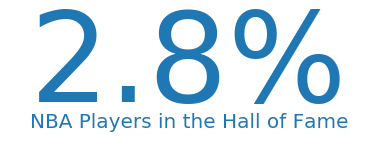

In [5]:
nba.hof_percent_plot()

##### Basketball Hall of Fame Categories

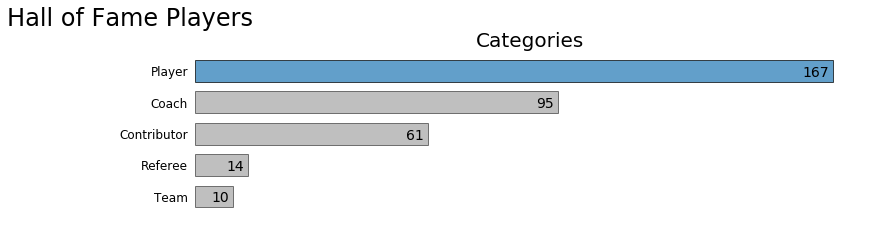

In [6]:
nba.hof_category_plot()

##### Basketball Player Hall of Fame Subcategories

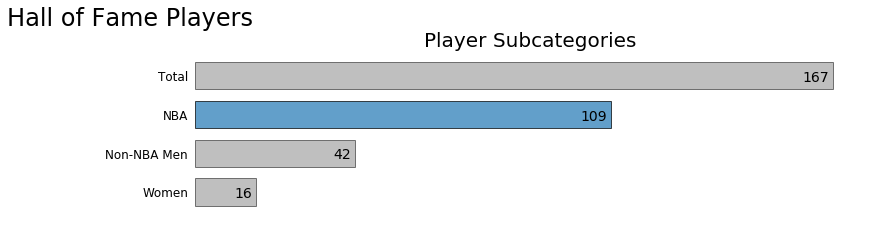

In [7]:
nba.hof_player_breakdown_plot()

##### NBA Player Birth Locations Histogram

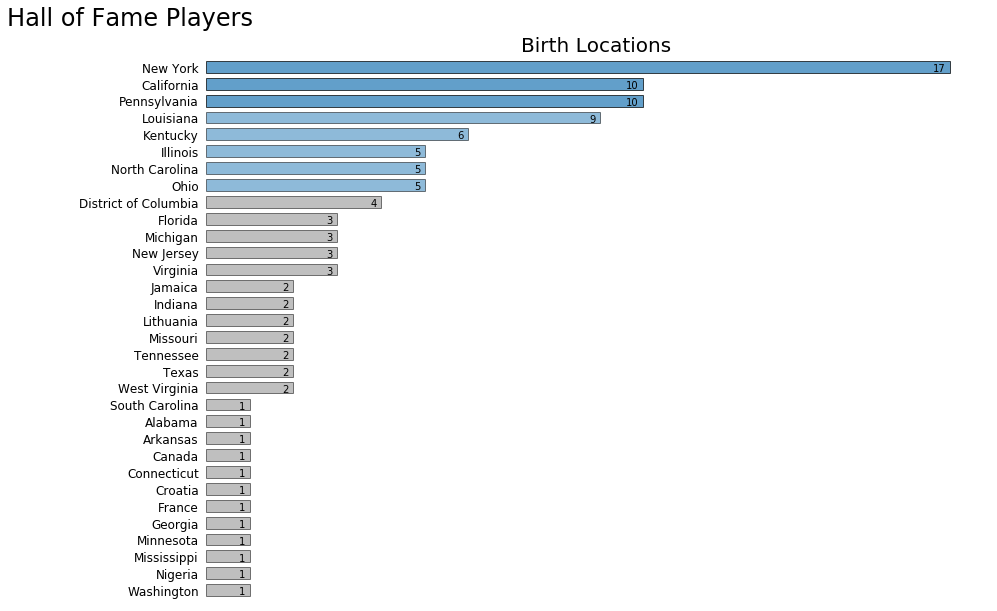

In [8]:
nba.hof_birth_loc_plot()

##### NBA Player Birth Locations Map

In [9]:
try:
    os.remove('hof_birth_map.html')
except FileNotFoundError:
    pass

nba.hof_birth_map_plot()

##### NBA Hall of Fame Players College Attendence

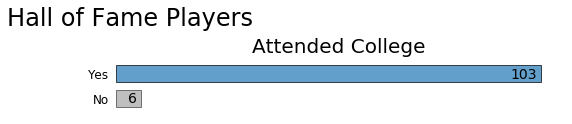

In [10]:
nba.hof_college_plot()

---
## Features

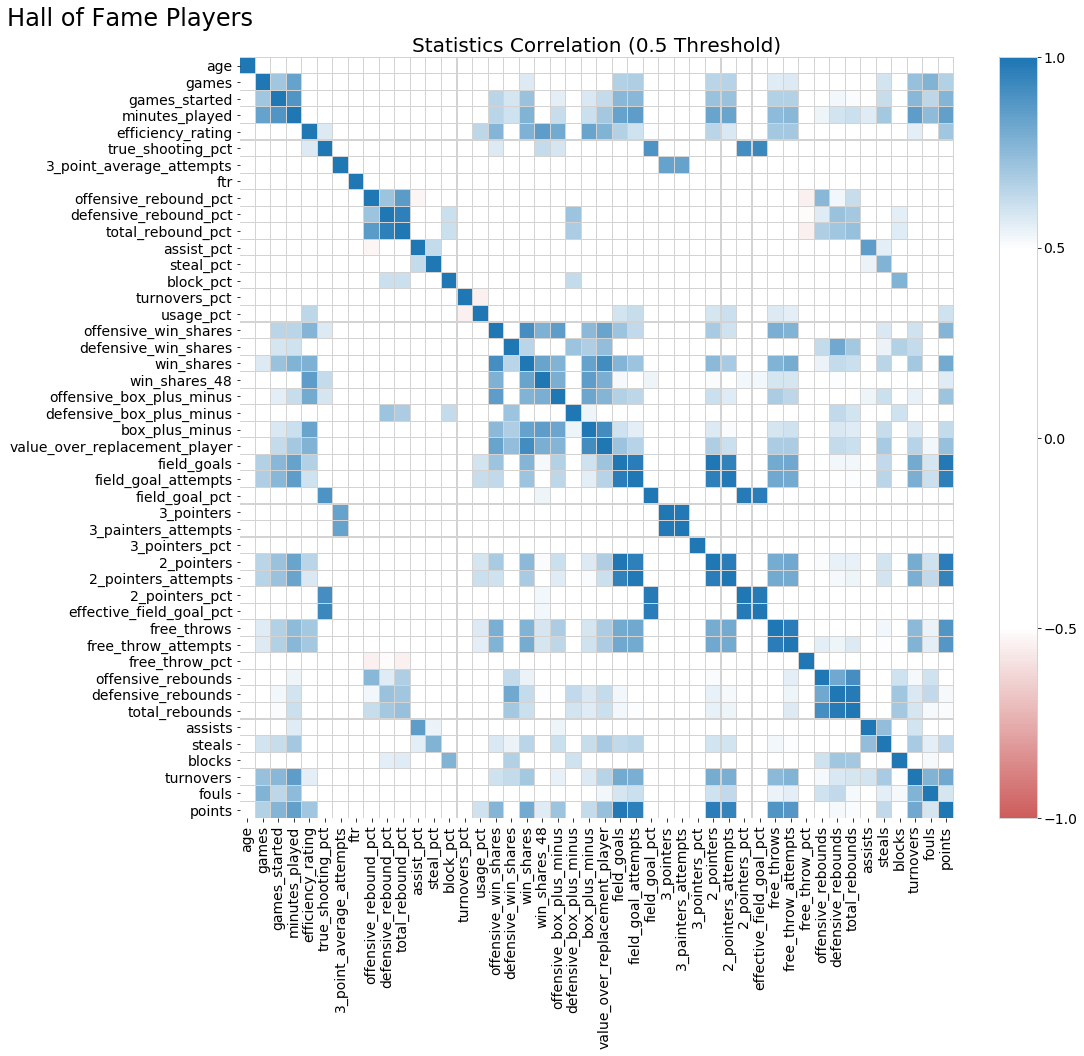

In [11]:
nba.hof_correlation_plot()

---
## Data Subsets

Subsets of the season statistics dataset are determined isolating records with complete features (no missing data).

A total of 21 subsets were identified, and stored in the *feature_subset* attribute dictionary with the record count as keys.

Each subset is a named tuple with the following fields.
- data: original data
- feature_names: names of included features
- x_test: x test dataset
- x_train: x training dataset
- y_test: y test dataset
- y_train: y training dataset

The test and train data has the following qualities.
- test set size is 20% of the subset
- training set is balanced with 500 random entries for both the Hall of Fame and Regular players
    - alter this parameter using the *training_size* attribute
- the random seed is set to 0 by default
    - alter this parameter using the *seed* attribute
- none of the test entries are included in the training dataset

In [12]:
subsets = nba.feature_subset.keys()
print(f'Number of Subsets: {len(subsets)}')

Number of Subsets: 21


---
## Principle Component Analysis (PCA)

The PCA for each of the subsets is calculated in the player.Statistics constructor.

The *pca* attribute is a dictionary with keys of features count for each subset.

Each PCA subset is a numedtuple with the following fields:
- cut_off: number of components that have a positive $2^{nd}$ derivative for the scree plot
- feature_names: names of included features
- fit: PCA model fit of the training datasets
- model: PCA model
- n_components: number of components
- subset: original subset data
- var_pct: variance percentage
- var_pct_cum: variance percentage cumulative sum
- variance: DataFrame combining var_pct and var_pct_cum
- x_test: x test dataset
- x_train: x training dataset
- y_test: y test dataset
- y_train: y training dataset

In [13]:
import pandas as pd

pca_subsets = pd.DataFrame(list(zip(nba.pca.keys(), nba.feature_subset.keys())),
                           columns=['Features', 'Records'])
pca_subsets.index = pca_subsets.index.rename('PCA Model')
pca_subsets

,Features,Records
PCA Model,,
0,48,49
1,47,48
2,46,47
3,45,46
4,43,44
5,42,43
6,41,42
7,40,41
8,36,37


---
## Model Evaluations

##### Comparision Plot

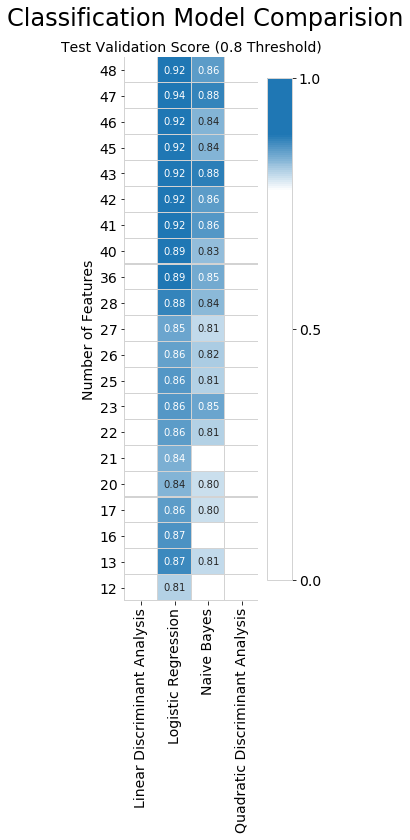

In [14]:
nba.evaluation_plot()

##### Chose Optimal Feature Subset

The random seed value is not set and calculations for all subsets are run 100 times with the top test score being tallied.

**Note**:

Models with 47 or 48 features result in the highest predictive classification scores.
The variation is due to the stochastic nature of the calculation.
With the seed values set to the default of 0 the optimal features to use will be 47.

In [15]:
# nba.optimal_features_plot(evaluations=100)

##### PCA Plot for Optimal Feature Subset

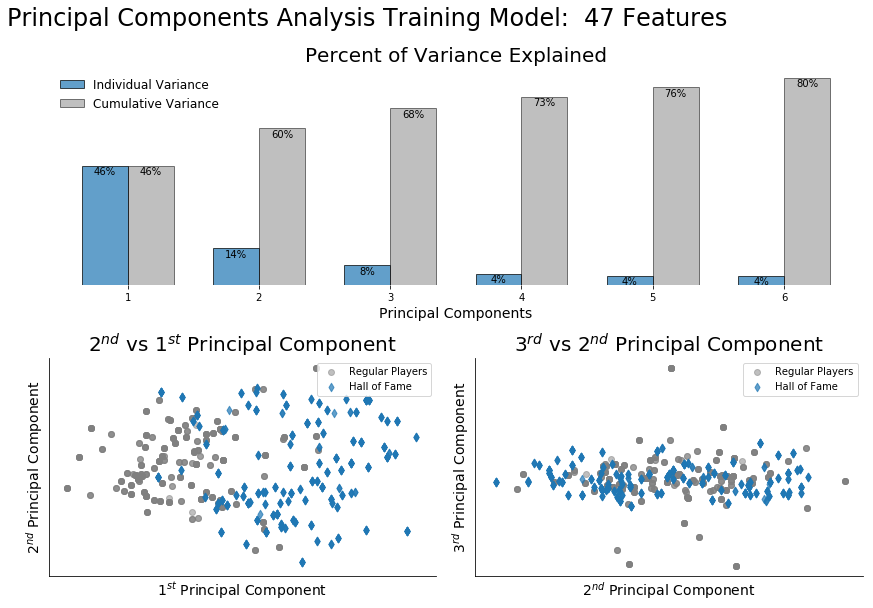

In [16]:
nba.classify_players(nba.pca[47], model='LR')
nba.pca_plot(nba.pca[47])

##### Confusion Matrix for Optimal Feature Subset

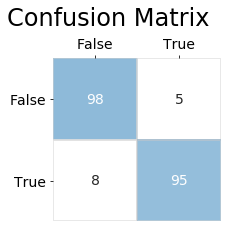

In [17]:
players.confusion_plot(nba.classify[47].confusion)

##### Evaluate All Players in a Subset

In [18]:
nba.evaluate_all_players(feature_qty=47, model='LR')



All Players Individual Seasons: 47 Features
Mean Score: 0.552
             precision    recall  f1-score   support

          0       0.99      0.55      0.70     16971
          1       0.05      0.73      0.09       515

avg / total       0.96      0.55      0.69     17486

Confusion Matrix
      0     1
0  9282  7689
1   141   374


All Players Categorize: 47 Features
Hall of Fame Accuracy: 0.025
Regular Players: 0.984


Players Predicted to be in the Hall of Fame: 47 Features
                  fame_seasons
player                        
Eddie Johnson               27
Mike Dunleavy               24
Vince Carter                22
Chauncey Billups            22
Gerald Henderson            22
Jason Kidd                  22
Tim Thomas                  21
Tim Hardaway                21
Andre Miller                21
Dale Ellis                  20
Sam Cassell                 20
Kobe Bryant                 20
Ray Allen                   20
Mark Jackson                20
Steve Blake      

###### Note:
At first glance the Classification Report and Confusion Matrix appear to be in disagreement.  scikit learn performs the following steps to generate the Classification Report.
1. Calculate the precision and recall for each class.
1. Use values from step 1 to calculate the F1 score.
1. Calculated a weighted average for precision, recall, and the F1 score.

In [19]:
nba.evaluate_all_players(feature_qty=47, model='LR')



All Players Individual Seasons: 47 Features
Mean Score: 0.552
             precision    recall  f1-score   support

          0       0.99      0.55      0.70     16971
          1       0.05      0.73      0.09       515

avg / total       0.96      0.55      0.69     17486

Confusion Matrix
      0     1
0  9282  7689
1   141   374


All Players Categorize: 47 Features
Hall of Fame Accuracy: 0.025
Regular Players: 0.984


Players Predicted to be in the Hall of Fame: 47 Features
                  fame_seasons
player                        
Eddie Johnson               27
Mike Dunleavy               24
Vince Carter                22
Chauncey Billups            22
Gerald Henderson            22
Jason Kidd                  22
Tim Thomas                  21
Tim Hardaway                21
Andre Miller                21
Dale Ellis                  20
Sam Cassell                 20
Kobe Bryant                 20
Ray Allen                   20
Mark Jackson                20
Steve Blake      